In [3]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import math
from sklearn.preprocessing import StandardScaler, RobustScaler, MaxAbsScaler, QuantileTransformer
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from imblearn.over_sampling import SMOTE
import scipy.stats as stats
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# import csv

In [4]:
df = pd.read_csv("../dataset/Chronic_Kidney_Dsease_data.csv")
print(df.shape)
df.head(10)

FileNotFoundError: [Errno 2] No such file or directory: '../dataset/Chronic_Kidney_Dsease_data.csv'

# 결측치 체크

<Axes: >

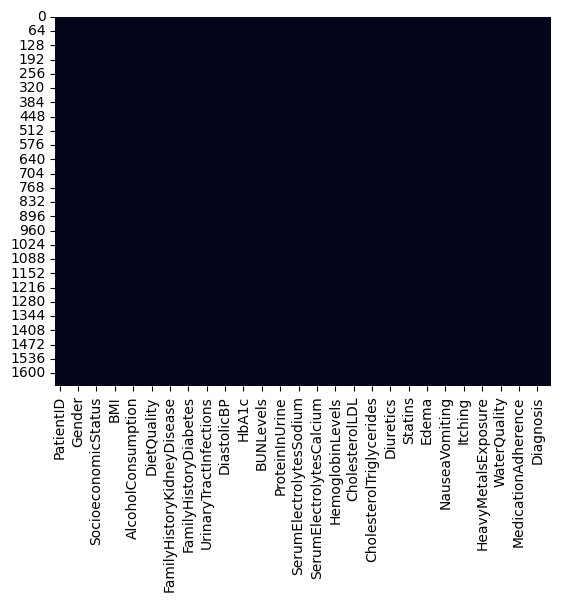

In [73]:
sns.heatmap(df.isnull(), cbar=False)

결측치 존재하지 않음

In [74]:
df.dtypes

PatientID                          int64
Age                                int64
Gender                             int64
Ethnicity                          int64
SocioeconomicStatus                int64
EducationLevel                     int64
BMI                              float64
Smoking                            int64
AlcoholConsumption               float64
PhysicalActivity                 float64
DietQuality                      float64
SleepQuality                     float64
FamilyHistoryKidneyDisease         int64
FamilyHistoryHypertension          int64
FamilyHistoryDiabetes              int64
PreviousAcuteKidneyInjury          int64
UrinaryTractInfections             int64
SystolicBP                         int64
DiastolicBP                        int64
FastingBloodSugar                float64
HbA1c                            float64
SerumCreatinine                  float64
BUNLevels                        float64
GFR                              float64
ProteinInUrine  

In [75]:
df.describe()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,MuscleCramps,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis
count,1659.000000,1659.000000,1659.000000,1659.00000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,...,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000
mean,830.000000,54.441230,0.515371,0.71308,0.977697,1.693189,27.620049,0.292948,9.969831,5.024247,...,3.525510,5.054869,49.730659,0.044002,0.103074,0.197107,2.000336,4.947788,5.144973,0.918626
std,479.056364,20.549757,0.499914,1.00043,0.776686,0.910611,7.288670,0.455252,5.798787,2.866274,...,2.026131,2.880460,27.827593,0.205162,0.304147,0.397934,1.141635,2.869959,2.901138,0.273492
min,1.000000,20.000000,0.000000,0.00000,0.000000,0.000000,15.033888,0.000000,0.021740,0.001186,...,0.006327,0.013697,0.087256,0.000000,0.000000,0.000000,0.001082,0.005392,0.004436,0.000000
25%,415.500000,36.000000,0.000000,0.00000,0.000000,1.000000,21.471449,0.000000,5.051156,2.555038,...,1.820793,2.532867,26.991708,0.000000,0.000000,0.000000,1.005802,2.498119,2.569561,1.000000
50%,830.000000,54.000000,1.000000,0.00000,1.000000,2.000000,27.652077,0.000000,9.951503,5.072395,...,3.572522,5.087086,48.970075,0.000000,0.000000,0.000000,2.040635,4.974069,5.182949,1.000000
75%,1244.500000,72.000000,1.000000,1.00000,2.000000,2.000000,34.015849,1.000000,14.967100,7.460563,...,5.254956,7.552093,73.913997,0.000000,0.000000,0.000000,2.947213,7.499783,7.733253,1.000000
max,1659.000000,90.000000,1.000000,3.00000,2.000000,3.000000,39.993532,1.000000,19.992713,9.998167,...,6.984636,9.998313,99.987510,1.000000,1.000000,1.000000,3.999469,9.992345,9.993754,1.000000


# 쓸모없는 Column 먼저 drop

In [76]:
df.drop(columns=['PatientID', 'DoctorInCharge'], inplace=True)

# Target(Y) 체크

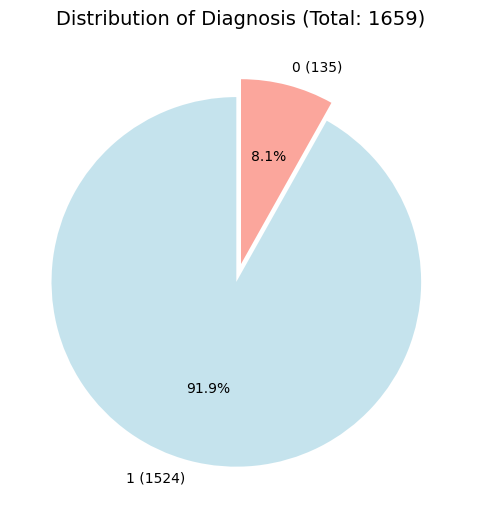

In [77]:
diagnosis_counts = df['Diagnosis'].value_counts()

total_count = len(df)

plt.figure(figsize=(8, 6))
plt.pie(
    diagnosis_counts,
    labels=[f"{label} ({count})" for label, count in diagnosis_counts.items()],
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightblue', 'salmon'],
    explode=[0.1, 0],
    wedgeprops={'alpha': 0.7}  
)
plt.title(f'Distribution of Diagnosis (Total: {total_count})', fontsize=14)
plt.show()


target의 불균형이 심각함.

# Categorical이지만, 비식별화 되어 Continues 된 변수의 분포를 체크

In [78]:
df['MuscleCramps']

0       4.518513
1       2.202222
2       5.967271
3       2.176387
4       6.800993
          ...   
1654    6.972093
1655    0.465297
1656    2.281970
1657    0.257814
1658    5.876286
Name: MuscleCramps, Length: 1659, dtype: float64

고유값 수: 1659
분포 요약:
0       1.018824
1       3.923538
2       1.429906
3       3.226416
4       0.285466
          ...   
1654    0.951836
1655    3.604147
1656    0.801955
1657    0.560298
1658    1.754852
Name: MedicalCheckupsFrequency, Length: 1659, dtype: float64


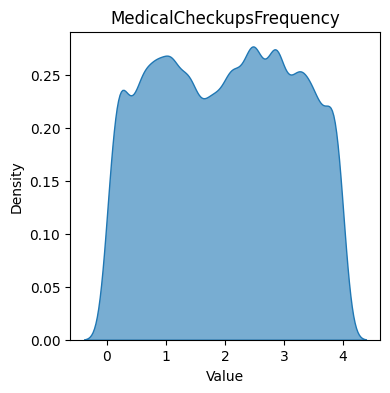

In [79]:
print("고유값 수:", len(df['MedicalCheckupsFrequency']))
print("분포 요약:")
print(df['MedicalCheckupsFrequency'])

plt.figure(figsize=(4, 4))
sns.kdeplot(df['MedicalCheckupsFrequency'], bw_adjust=0.5, fill=True, alpha=0.6)
plt.title('MedicalCheckupsFrequency')
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

In [80]:
# 가장 가까운 정수와의 차이 계산
df['Rounded'] = df['MuscleCramps'].round()  # 정수로 반올림
df['Difference'] = abs(df['MuscleCramps'] - df['Rounded'])

# 차이의 요약 통계
difference_summary = df['Difference'].describe()
difference_summary

count    1659.000000
mean        0.250986
std         0.144801
min         0.000726
25%         0.124247
50%         0.254828
75%         0.376047
max         0.499950
Name: Difference, dtype: float64

기존 관측치 + random한 noise (+- 0.5 추정) 이 있는 것 같다. 굳이 분석하는데 처리해줄 필요가 없을 듯 보임

In [81]:
df.drop(columns=['Difference', 'Rounded'], inplace=True)

# Categorical or Binary형 변수, 분포를 체크

나이, 출신성분은 categorical이지만, 순서가 없는 nominal 변수기 때문에 one-hot encoding으로 처리 나머지 categorical형 변수는 순서가 있기에 처리 X

In [82]:
'''
gender = pd.get_dummies(df['Gender'], prefix='Gender', drop_first=True)
ethnicity = pd.get_dummies(df['Ethnicity'], prefix='Ethnicity', drop_first=True)

gender = gender.astype(int)
ethnicity = ethnicity.astype(int)

df.drop(columns=['Gender', 'Ethnicity'], inplace=True)

df = pd.concat([gender, ethnicity, df], axis=1)
df
'''

"\ngender = pd.get_dummies(df['Gender'], prefix='Gender', drop_first=True)\nethnicity = pd.get_dummies(df['Ethnicity'], prefix='Ethnicity', drop_first=True)\n\ngender = gender.astype(int)\nethnicity = ethnicity.astype(int)\n\ndf.drop(columns=['Gender', 'Ethnicity'], inplace=True)\n\ndf = pd.concat([gender, ethnicity, df], axis=1)\ndf\n"

Index(['Gender', 'Ethnicity', 'SocioeconomicStatus', 'EducationLevel',
       'Smoking', 'FamilyHistoryKidneyDisease', 'FamilyHistoryHypertension',
       'FamilyHistoryDiabetes', 'PreviousAcuteKidneyInjury',
       'UrinaryTractInfections', 'ACEInhibitors', 'Diuretics', 'Statins',
       'AntidiabeticMedications', 'Edema', 'HeavyMetalsExposure',
       'OccupationalExposureChemicals', 'WaterQuality'],
      dtype='object')


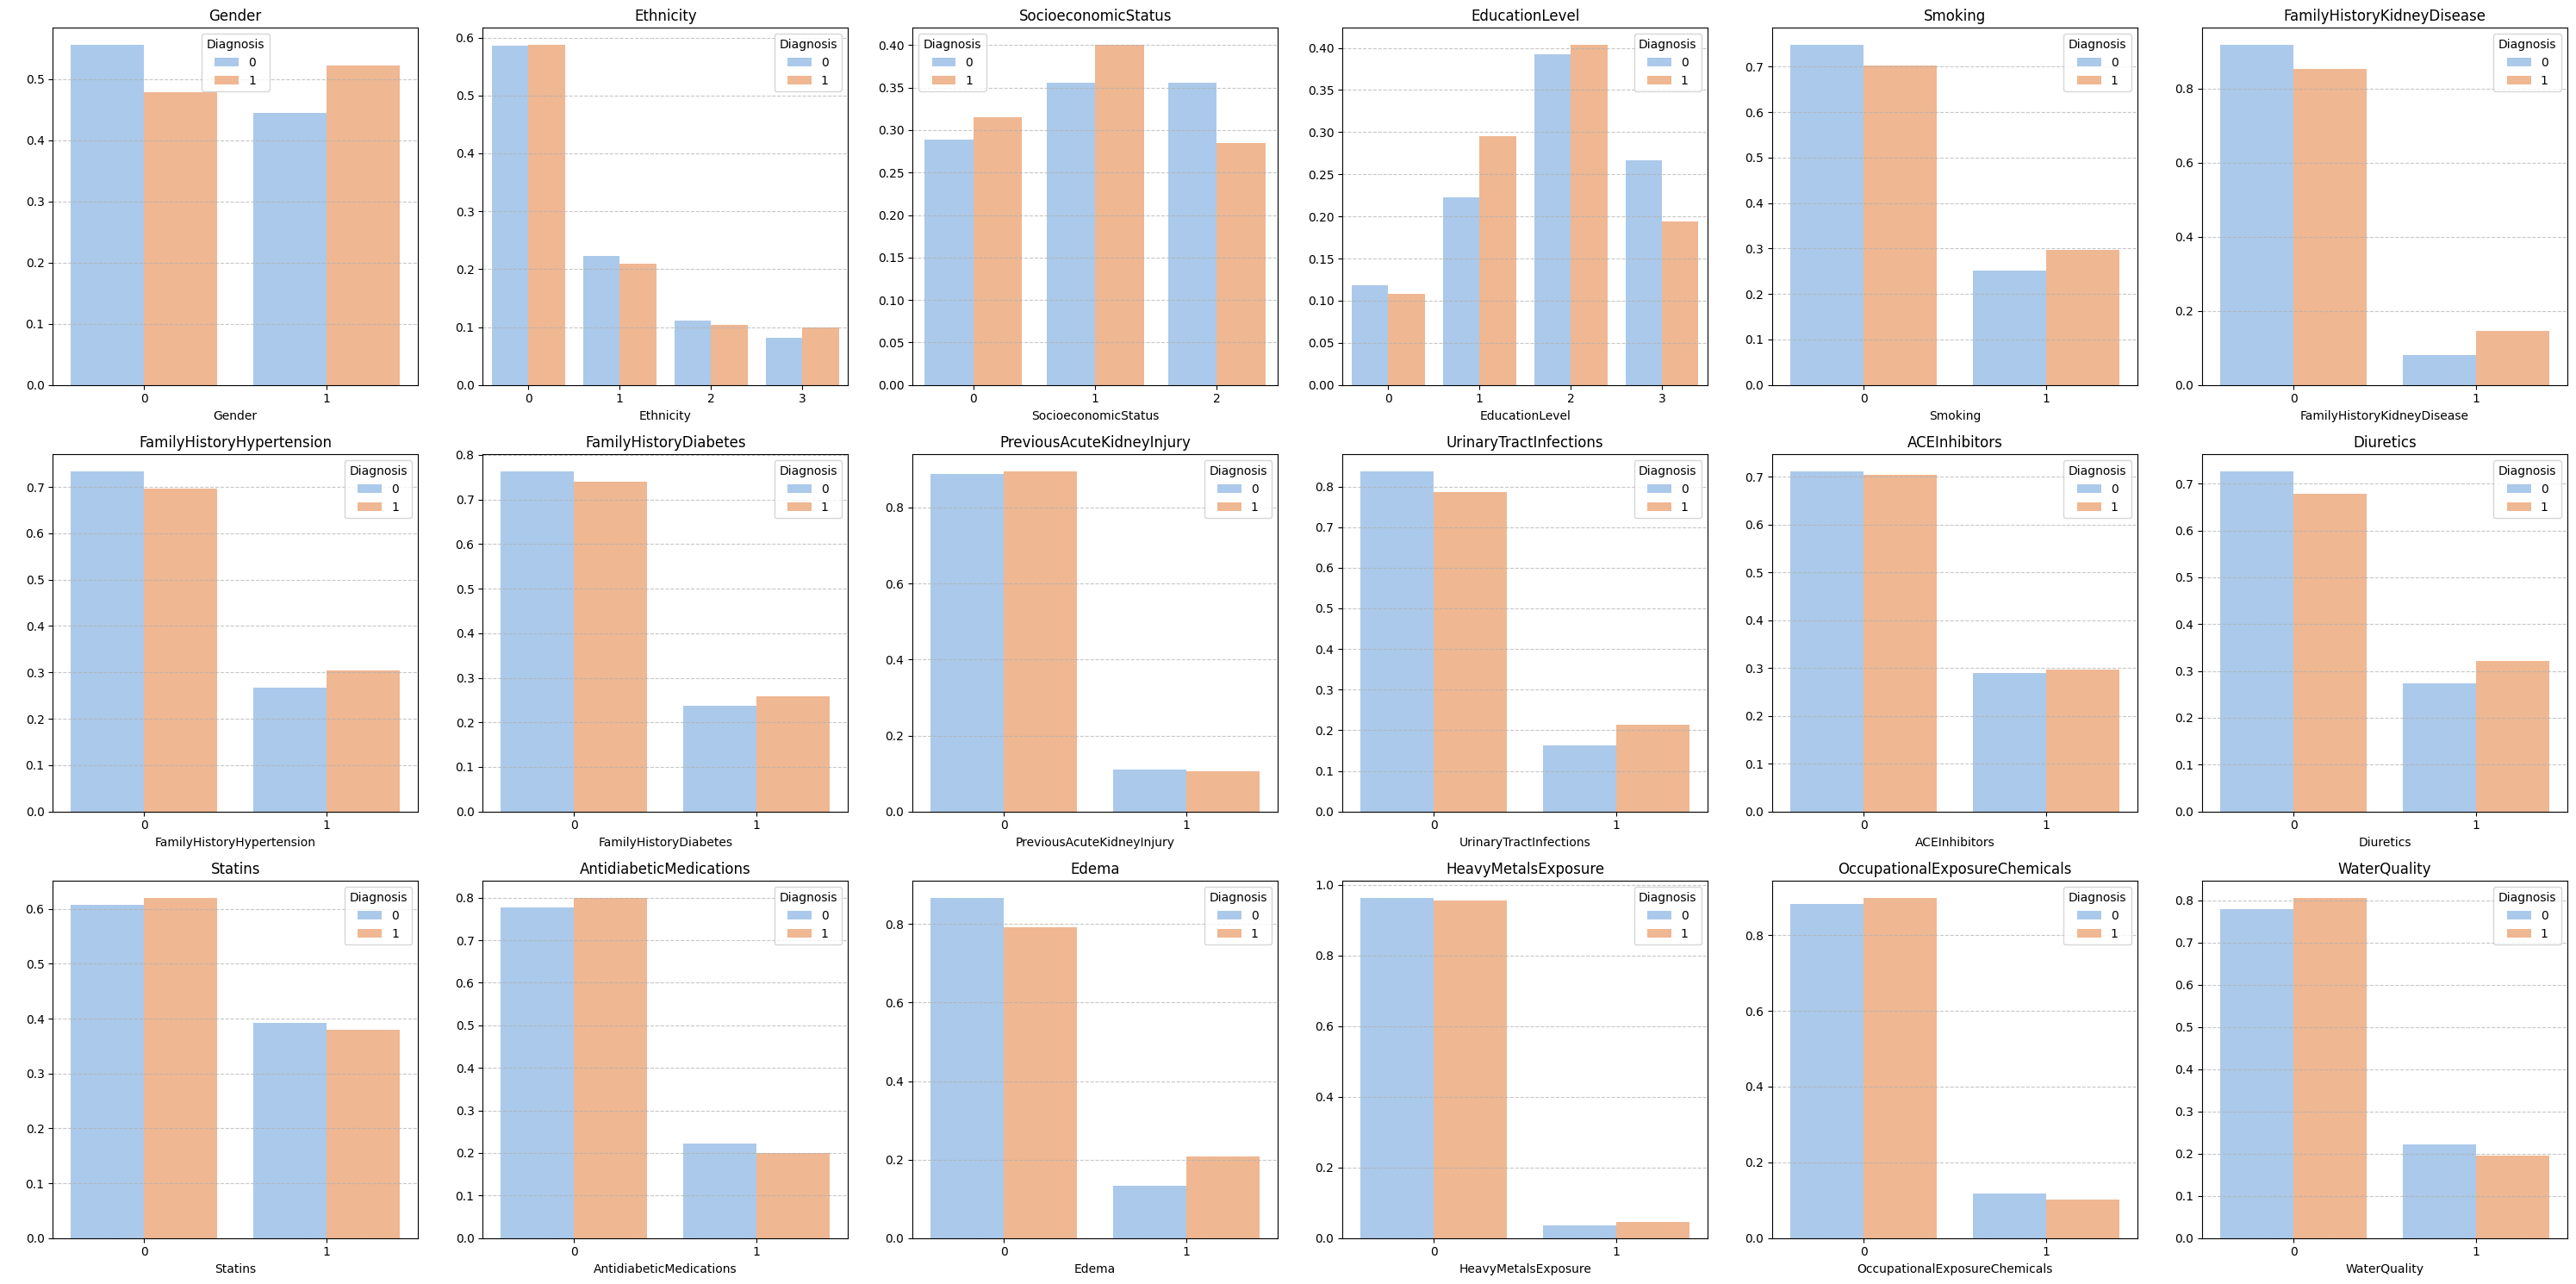

In [83]:
categorical = df.select_dtypes(['int64']).columns
categorical = categorical.drop(labels=['Age', 'DiastolicBP', 'SystolicBP', 'Diagnosis'])
print(categorical)
num_vars = len(categorical)
cols = 6  # 한 행에 6개의 그래프
rows = math.ceil(num_vars / cols)

fig, axes = plt.subplots(rows, cols, figsize=(30, rows * 5))
axes = axes.flatten()

for i, column in enumerate(categorical):
    # Diagnosis에 따른 비율 계산
    prop_df = (
        df.groupby(['Diagnosis', column]).size()  # 그룹화 후 크기 계산
        .div(df.groupby('Diagnosis')[column].count())  # 각 그룹 내 카운트로 나누어 비율을 계산
        .reset_index(name=' ')  # 'Proportion' 컬럼명으로 데이터프레임 생성
    )
    
    # 비율 그래프 생성
    sns.barplot(
        data=prop_df,
        x=column,
        y=' ',
        hue='Diagnosis',
        palette='pastel',
        ax=axes[i]
    )
    axes[i].set_title(f'{column}', fontsize=12)
    axes[i].legend(title='Diagnosis', fontsize=10)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# 남은 서브플롯 제거
for i in range(len(categorical), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

target의 imbalance하기 때문에 전체적인 비율로 각 컬럼별 비율을 살펴보았다. 미세하게 차이가 나긴 하지만, 특출 난 특정 변수가 병의 존재유무를 좌지우지하는 그건없는것 같다.

# 나머지 continuous형 변수에 대한 분포 체크

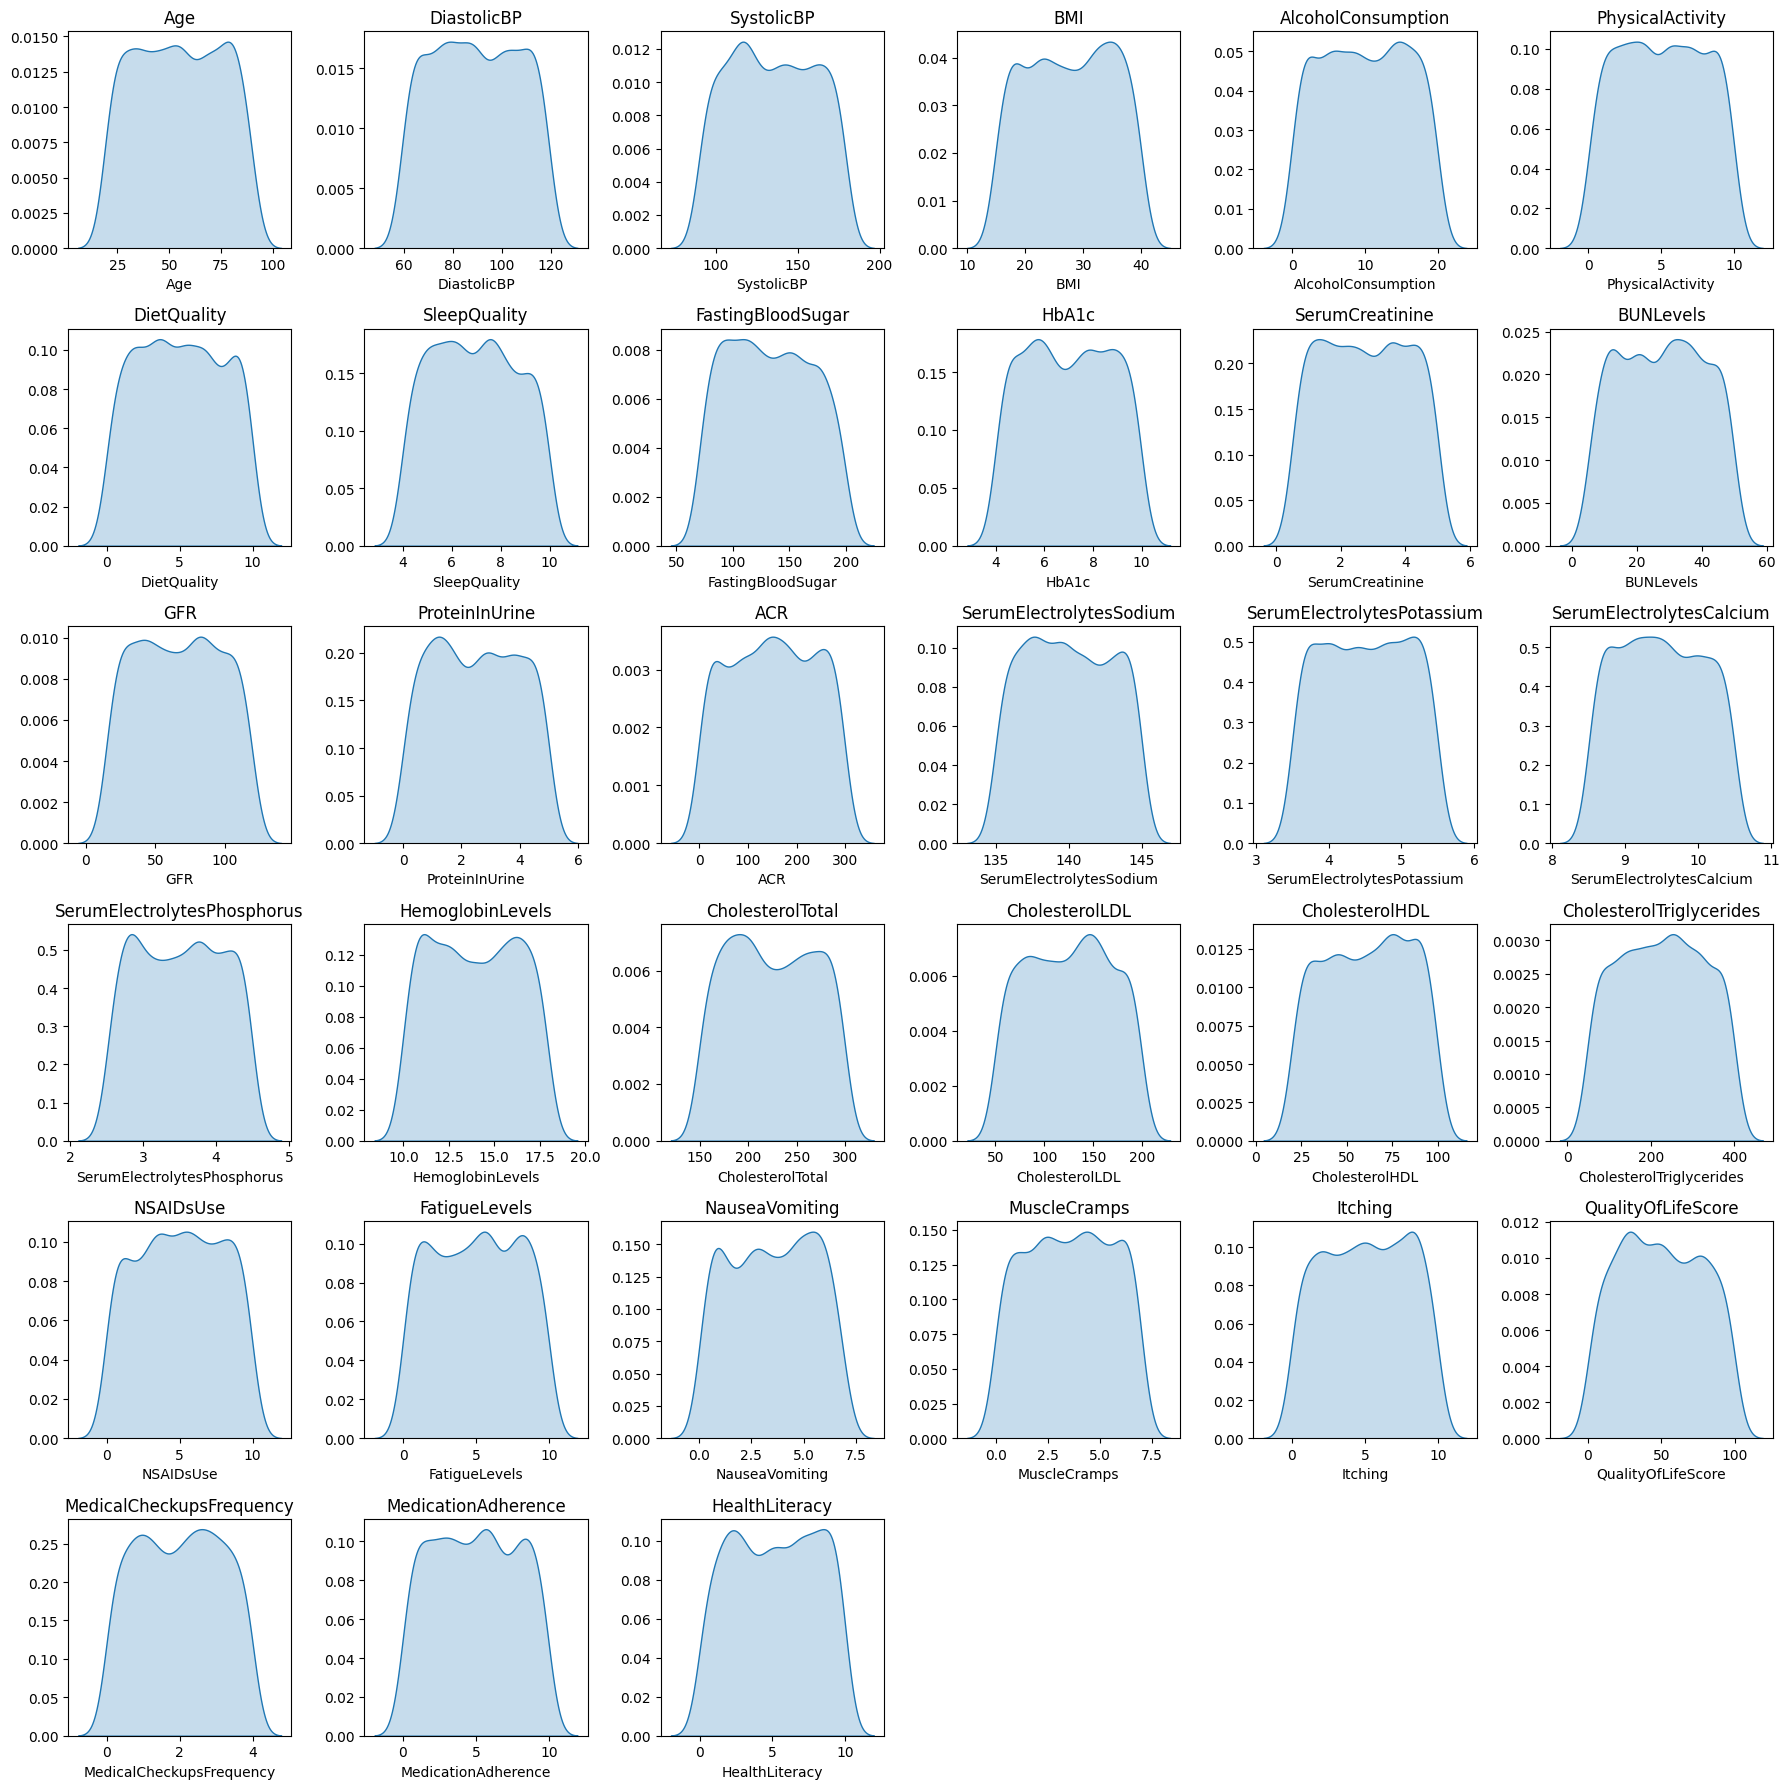

In [84]:
continuous = df.select_dtypes(['float64']).columns
continuous = pd.Index(['Age', 'DiastolicBP', 'SystolicBP']).append(continuous)

num_vars = len(continuous)
cols = 6
rows = math.ceil(num_vars / cols)

fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 3))
axes = axes.flatten()

for i, column in enumerate(continuous):
    ax = axes[i]
    if column in df.columns:
        sns.kdeplot(df[column].dropna(), ax=ax, fill=True)
        ax.set_title(f'{column}')
        ax.set_ylabel('')
    else:
        ax.set_visible(False)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

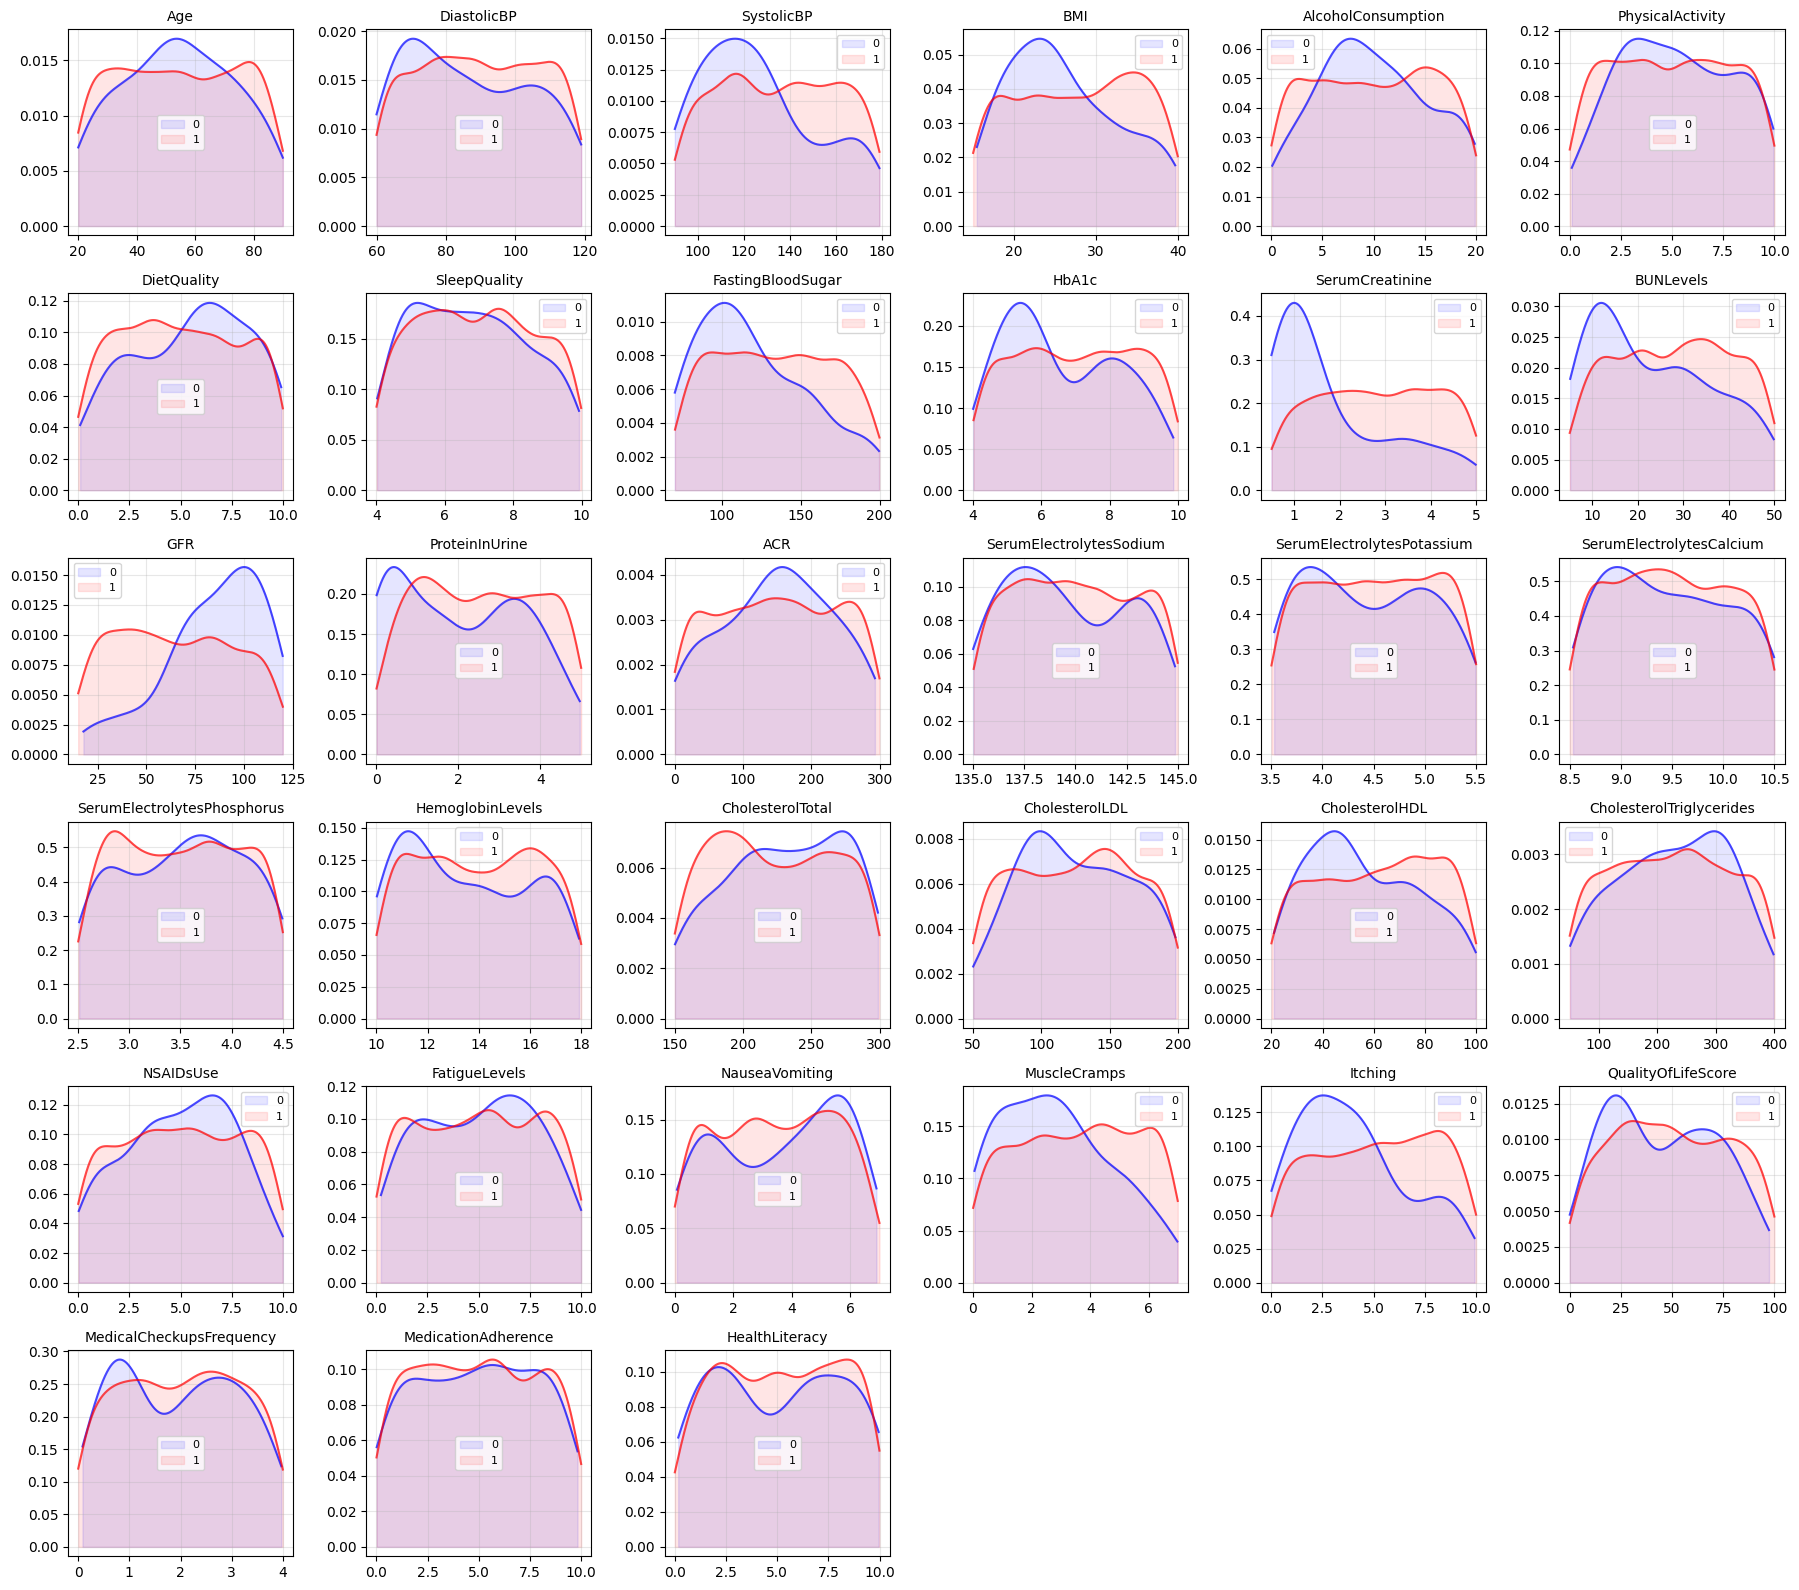

In [85]:
num_cols = len(continuous)
fig, axes = plt.subplots(nrows=(num_cols // 6 + 1), ncols=6, figsize=(18, num_cols // 2))
axes = axes.flatten()

# diagnosis에 따라 0과 1로 데이터 나누기
df_0 = df[df['Diagnosis'] == 0]
df_1 = df[df['Diagnosis'] == 1]

for i, column in enumerate(continuous):
    ax = axes[i]
    
    # diagnosis 0에 대한 KDE
    variable_data_0 = df_0[column]
    kde_0 = gaussian_kde(variable_data_0)
    x_vals_0 = np.linspace(variable_data_0.min(), variable_data_0.max(), 1000)
    pdf_vals_0 = kde_0(x_vals_0)
    
    # diagnosis 1에 대한 KDE
    variable_data_1 = df_1[column]
    kde_1 = gaussian_kde(variable_data_1)
    x_vals_1 = np.linspace(variable_data_1.min(), variable_data_1.max(), 1000)
    pdf_vals_1 = kde_1(x_vals_1)
    
    # 그래프 채우기: x축 시작부터 채움
    ax.fill_between(x_vals_0, pdf_vals_0, color='blue', alpha=0.1, label='0')
    ax.fill_between(x_vals_1, pdf_vals_1, color='red', alpha=0.1, label='1')
    
    # 선 그리기 (선은 조금 더 두껍게)
    ax.plot(x_vals_0, pdf_vals_0, color='blue', alpha=0.7)
    ax.plot(x_vals_1, pdf_vals_1, color='red', alpha=0.7)
    
    ax.set_title(column, fontsize=10)
    ax.legend(fontsize=8)
    ax.grid(alpha=0.3)

# 남은 axes 비활성화
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


전반적인 분포가 양성,음성 비슷하지만, 혈압이 높을 수록, BMI가 높을수록, MuscleCramps(근육경련)이 많이 일어날수록, GFR(사구체여과율) 이 낮을수록 만성 신장 질환 예측이 높다는 것을 확인 할 수 있다.

# Continuous 변수 outliner 확인 (Boxplot)

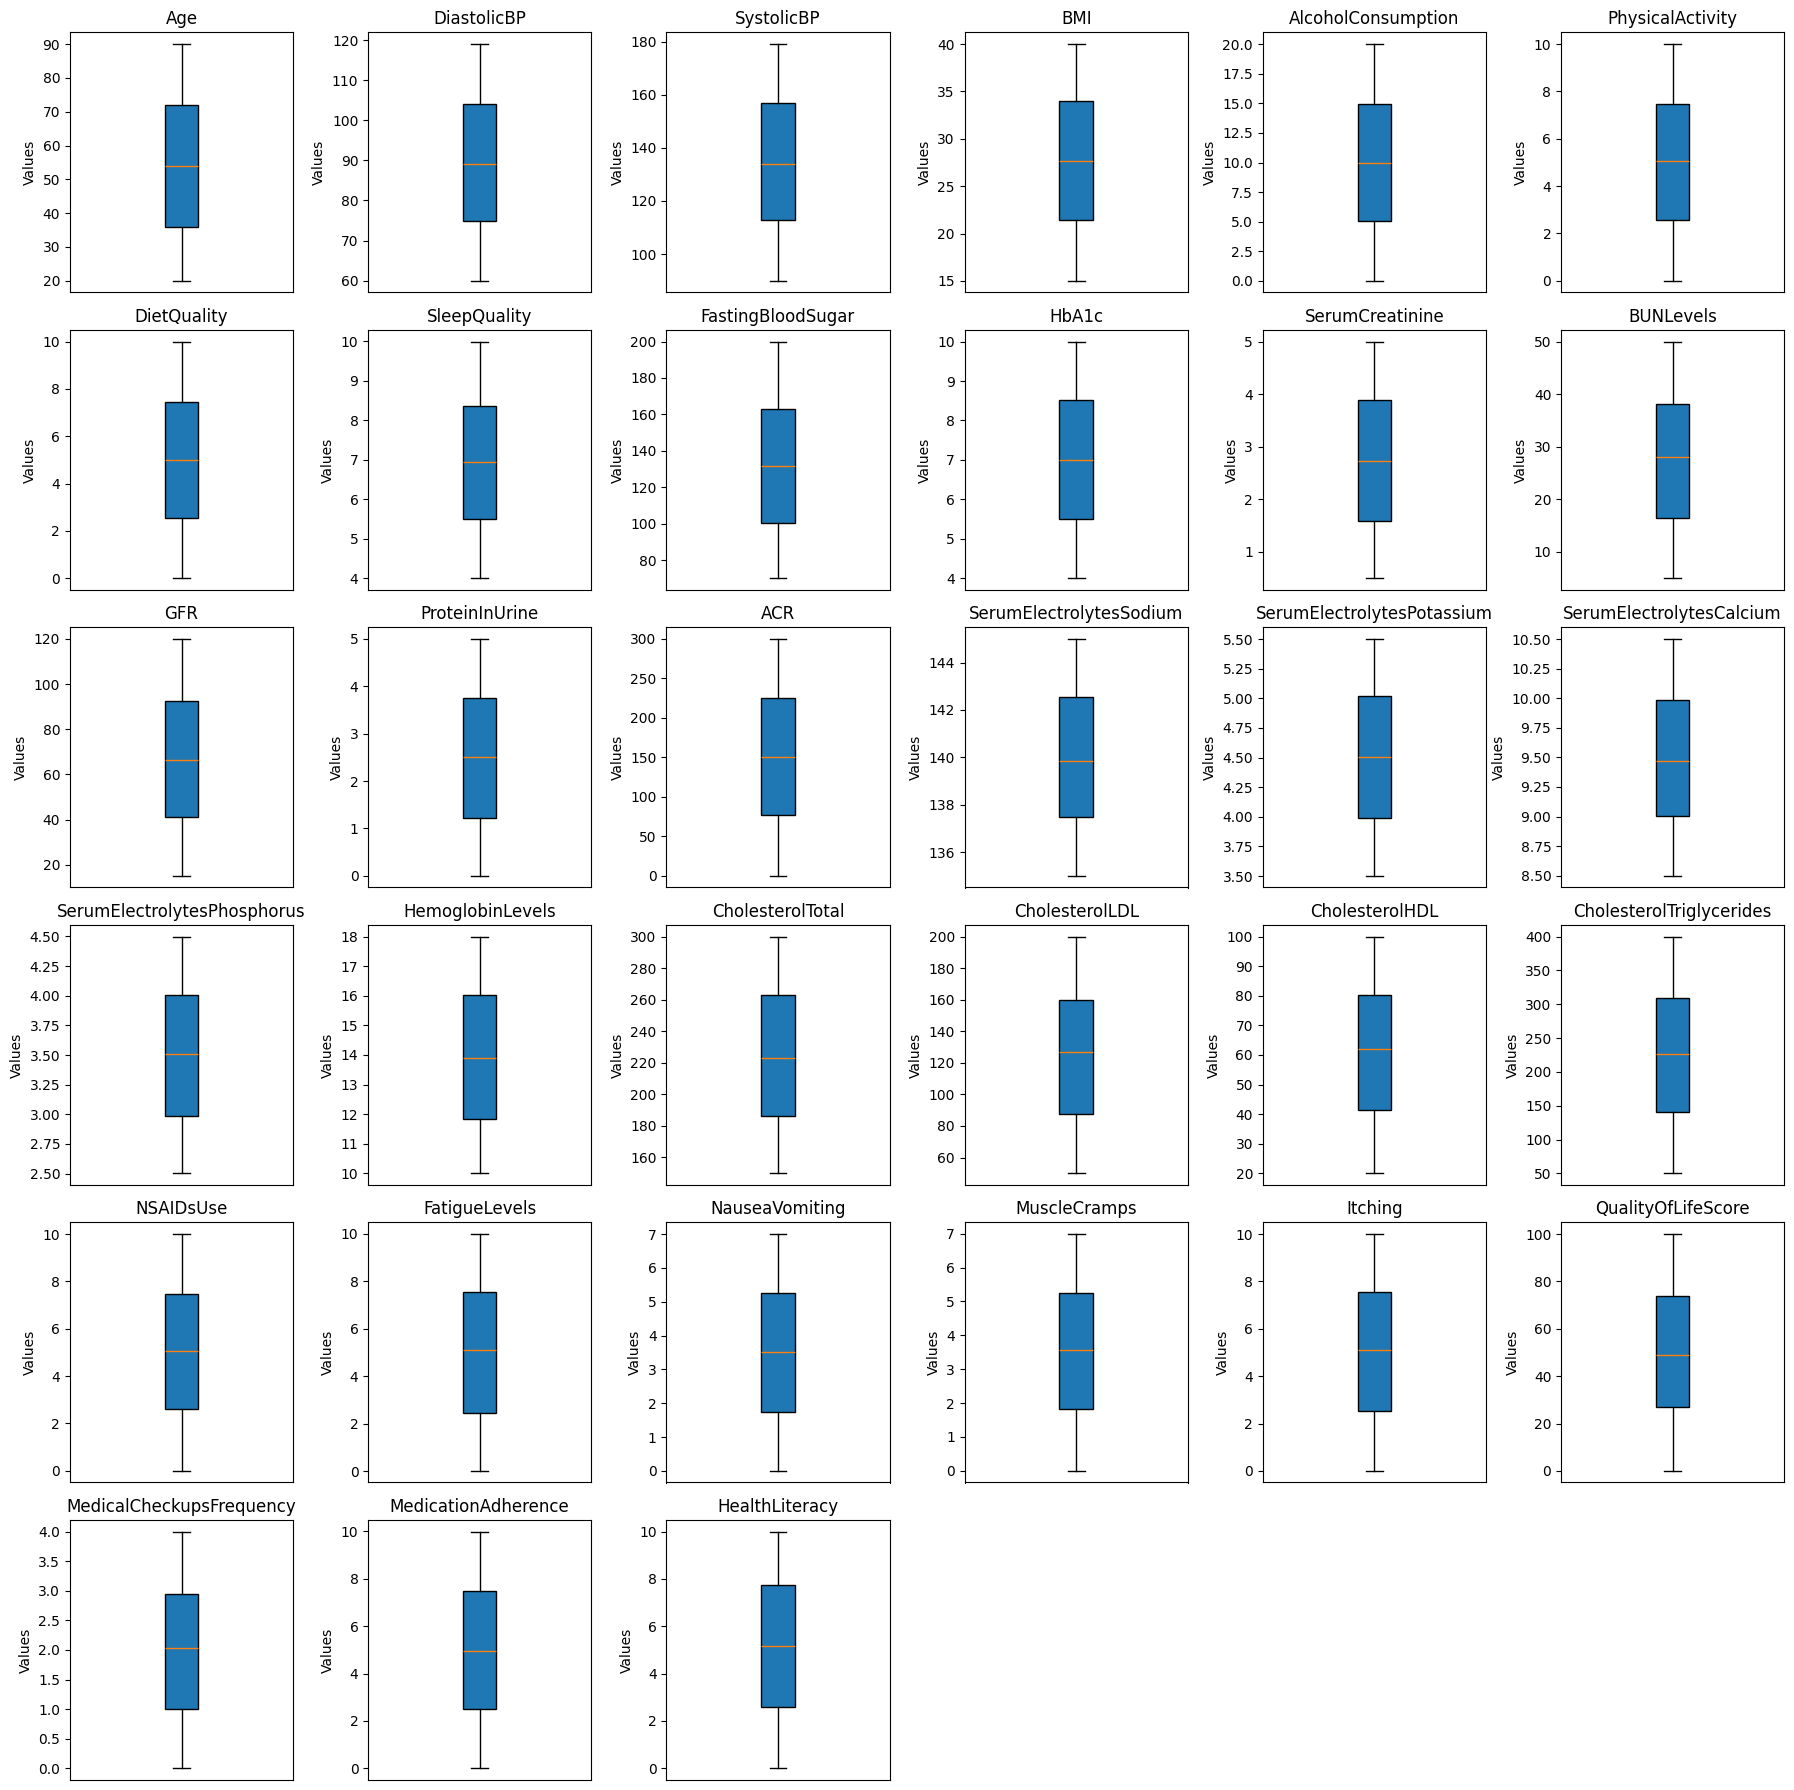

In [86]:
num_vars = len(continuous)
cols = 6
rows = math.ceil(num_vars / cols)

fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 3))
axes = axes.flatten()

for i, column in enumerate(continuous):
    ax = axes[i]
    if column in df.columns:
        ax.boxplot(df[column].dropna(), vert=True, patch_artist=True)
        ax.set_title(f'{column}')
        ax.set_ylabel('Values')
        ax.set_xticks([])
    else:
        ax.set_visible(False)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

전반적으로 이상치도 없고 분포도 정규분포의 형태를 따르는 것 같다. 따라서, StandardScaler을 사용

In [87]:
scaler = StandardScaler()
df[continuous] = scaler.fit_transform(df[continuous])

In [88]:
target = df['Diagnosis']
df.drop(columns=['Diagnosis'], inplace=True)

Corrlation Matrix

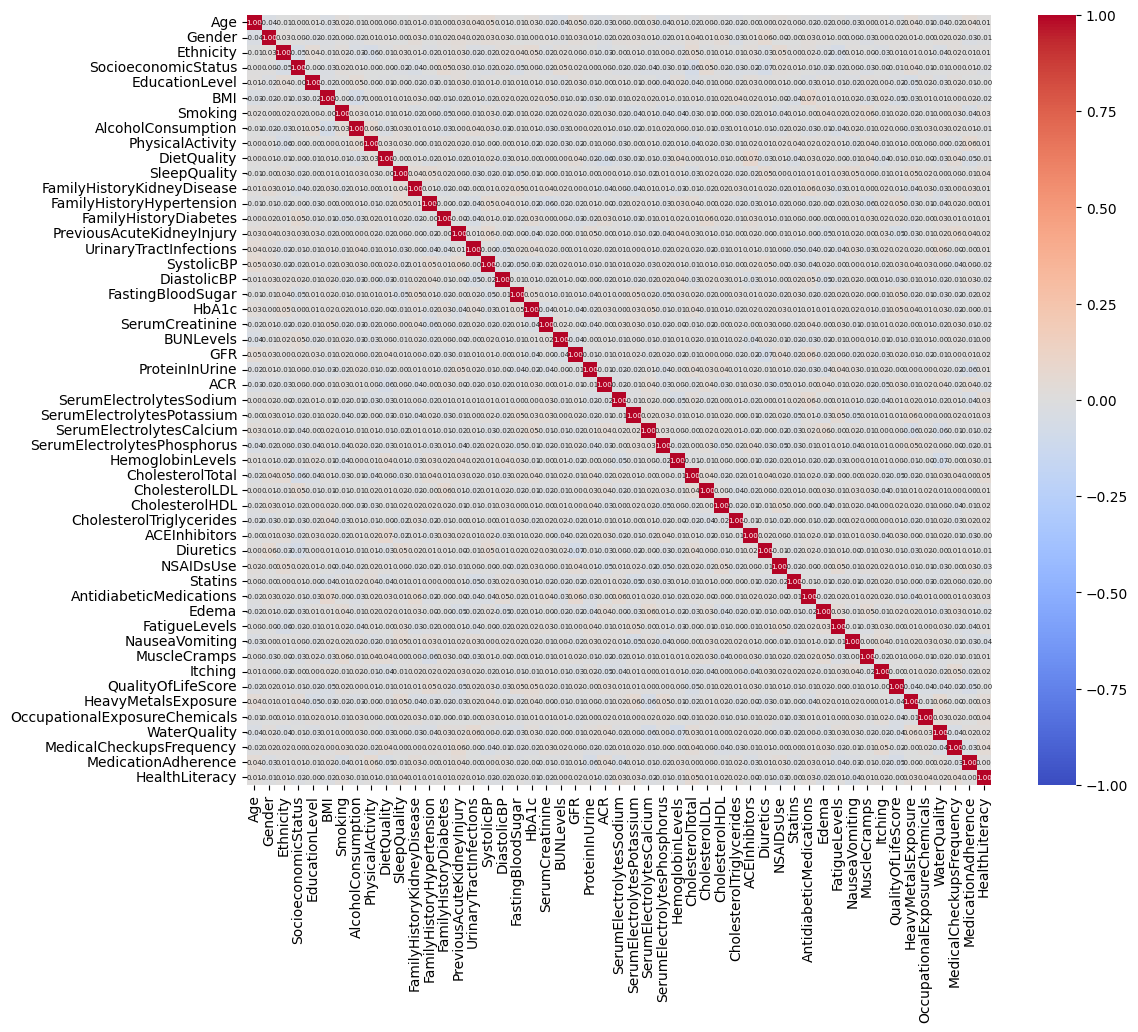

In [89]:
corr = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 5}, vmin=-1, vmax=1)
plt.show()

In [106]:
t = 0

pairs = []
pair_set = set()
for i in range(len(corr.columns)):
    for j in range(i+1, len(corr.columns)):
        if abs(corr.iloc[i, j]) > t:
            col1 = corr.columns[i]
            col2 = corr.columns[j]
            c = corr.iloc[i, j]
            if((col1, col2) not in pair_set): #(col1, col2), (col2, col1) 두번 들어오는 걸 방지
                pairs.append((col1, col2, c))
                pair_set.add((col1, col2))
pairs.sort()
pairs

[('ACEInhibitors',
  'AntidiabeticMedications',
  np.float64(0.015647763849607192)),
 ('ACEInhibitors', 'Diuretics', np.float64(0.017163016974952556)),
 ('ACEInhibitors', 'Edema', np.float64(-0.00969352580949489)),
 ('ACEInhibitors', 'FatigueLevels', np.float64(-0.00618882063198397)),
 ('ACEInhibitors', 'HealthLiteracy', np.float64(-0.003355688433902139)),
 ('ACEInhibitors', 'HeavyMetalsExposure', np.float64(-0.0036151919713160703)),
 ('ACEInhibitors', 'Itching', np.float64(-0.03697060907092556)),
 ('ACEInhibitors',
  'MedicalCheckupsFrequency',
  np.float64(-0.008827927692038204)),
 ('ACEInhibitors', 'MedicationAdherence', np.float64(-0.03414016350447309)),
 ('ACEInhibitors', 'MuscleCramps', np.float64(0.025304169652053156)),
 ('ACEInhibitors', 'NSAIDsUse', np.float64(0.0014204108748009535)),
 ('ACEInhibitors', 'NauseaVomiting', np.float64(0.008460321310236236)),
 ('ACEInhibitors',
  'OccupationalExposureChemicals',
  np.float64(-0.006545780526130646)),
 ('ACEInhibitors', 'QualityOfLi

# 다중공선성 체크

In [91]:
vif = pd.DataFrame()


vif['VIF_Factor'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif['Feature'] = df.columns

vif = vif.sort_values(by='VIF_Factor', ascending=False)
vif

,VIF_Factor,Feature
4,3.190538,EducationLevel
3,2.288606,SocioeconomicStatus
1,1.969085,Gender
37,1.545834,Statins
2,1.501136,Ethnicity
35,1.451005,Diuretics
34,1.420025,ACEInhibitors
6,1.408556,Smoking
12,1.394596,FamilyHistoryHypertension
13,1.346782,FamilyHistoryDiabetes


개별 상관계수는 낮아도, 여러 변수가 함께 작용해 특정 변수를 예측할 수 있다면 VIF 값은 높아질 수 있다.

In [92]:
t = 10
feature = vif[vif['VIF_Factor'] > t]['Feature'].tolist()
df = df.drop(columns=feature)
df

,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,NauseaVomiting,MuscleCramps,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy
0,0.806032,0,0,0,2,0.473393,1,-0.835206,-1.168429,-1.671310,...,1.767706,0.490246,0.868676,0.947049,0,0,1,-0.860001,0.006629,1.629671
1,-0.995019,0,0,1,3,0.284372,1,1.490368,1.170279,0.514741,...,-1.574176,-0.653308,0.618802,-0.345163,0,0,0,1.685111,1.129795,0.695382
2,1.244125,1,1,0,1,1.341496,1,0.329927,1.599476,-1.020525,...,0.600268,1.205499,-1.010611,1.550806,0,1,1,-0.499811,0.932782,0.761882
3,-0.702956,0,2,0,1,0.509112,0,1.043694,-1.610721,0.675720,...,1.112626,-0.666063,0.702294,1.450425,0,0,0,1.074293,-0.580357,0.511889
4,-0.556925,0,1,1,2,-0.534379,0,-0.349434,-1.481089,-0.673929,...,-0.608685,1.617107,-0.521515,-1.598618,0,0,1,-1.502570,-0.382800,-1.278362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1654,1.730896,0,0,1,2,1.654711,1,-1.483461,-0.302328,1.247622,...,-0.977431,1.701580,-1.012606,1.127714,0,0,0,-0.918696,1.603222,-1.068441
1655,-0.995019,0,0,2,1,0.178683,0,-1.138126,1.613479,1.678367,...,0.373701,-1.510828,0.992049,-1.406591,0,1,0,1.405260,-1.163413,-1.662109
1656,1.438834,0,0,2,3,-0.777994,0,1.010192,0.811653,0.003368,...,1.298816,-0.613936,-1.750018,0.715433,0,0,0,-1.050021,0.286094,-0.072361
1657,1.730896,0,0,2,2,-0.364497,0,0.517097,-1.537523,-0.164392,...,0.337200,-1.613263,-0.563310,-0.642457,0,0,0,-1.261762,-0.767932,-1.662739


# SMOTE vs Original distrbution PCA

oversampling 하는 건 Target 이 0인 class이기 때문에 class 0에 관련해서만 PCA를 적용

In [93]:
df_target_0 = df[target == 0]
df_target_1 = df[target == 1] 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_target_0)
pca = PCA(n_components=2)

df_pca = pca.fit_transform(X_scaled)

# SMOTE

In [94]:
smote = SMOTE(random_state=42)
x_smote, y_smote = smote.fit_resample(df, target)

In [95]:
df_smote = pd.DataFrame(x_smote, columns=df.columns)
df_smote['Diagnosis'] = y_smote

SMOTE 된거 분포 확인

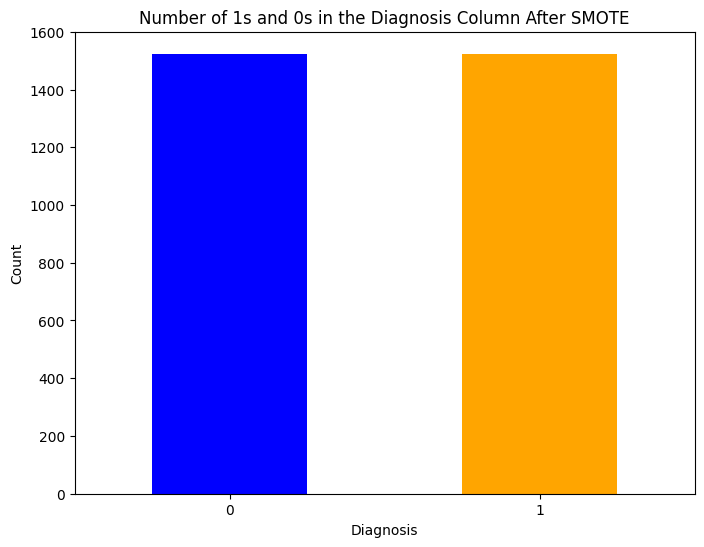

Diagnosis
0    1524
1    1524
Name: count, dtype: int64


In [96]:
target_smote_plot = df_smote['Diagnosis'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
target_smote_plot.plot(kind='bar', color=['blue', 'orange'])
plt.title('Number of 1s and 0s in the Diagnosis Column After SMOTE')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['0', '1'], rotation=0)
plt.show()
print(target_smote_plot)

oversampling한 Diagonsis = 0인 관측치로만 pca

In [97]:
df_smote_target_0 = df_smote[df_smote['Diagnosis'] == 0]
df_smote_target_1 = df_smote[df_smote['Diagnosis'] == 1]

temp = df_smote_target_0
temp.drop(columns=['Diagnosis'], inplace=True)
df_smote_pca = pca.transform(temp)

C:\Users\carly\AppData\Local\Temp\ipykernel_28772\2433795408.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.drop(columns=['Diagnosis'], inplace=True)
c:\Python\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


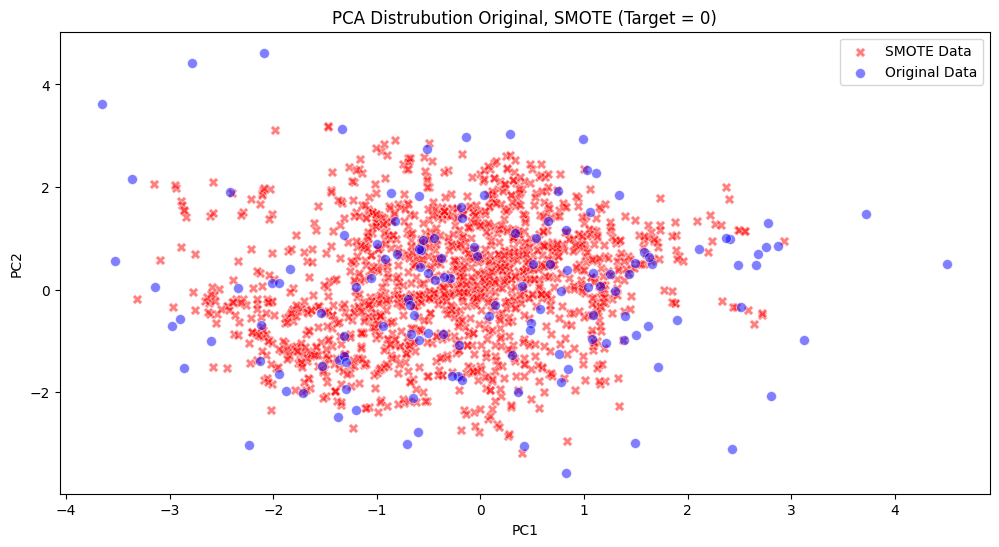

In [98]:
X_pca_df = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
X_pca_df['Source'] = 'Original Data'

X_smote_pca_df = pd.DataFrame(df_smote_pca, columns=['PC1', 'PC2'])
X_smote_pca_df['Source'] = 'SMOTE Data'

combined_df = pd.concat([X_pca_df, X_smote_pca_df])

plt.figure(figsize=(12, 6))

sns.scatterplot(x='PC1', y='PC2', data=X_smote_pca_df, color='red', s=50, marker='X', alpha=0.5, label='SMOTE Data')
sns.scatterplot(x='PC1', y='PC2', data=X_pca_df, color='blue', s=50, alpha=0.5, label='Original Data')

plt.title('PCA Distrubution Original, SMOTE (Target = 0)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# PCA 분산 검정 (ANOVA)

In [99]:
original_data_pc1 = X_pca_df[X_pca_df['Source'] == 'Original Data']['PC1']
original_data_pc2 = X_pca_df[X_pca_df['Source'] == 'Original Data']['PC2']

smote_data_pc1 = X_smote_pca_df[X_smote_pca_df['Source'] == 'SMOTE Data']['PC1']
smote_data_pc2 = X_smote_pca_df[X_smote_pca_df['Source'] == 'SMOTE Data']['PC2']

# PC1에 대한 ANOVA
f_stat_pc1, p_val_pc1 = stats.f_oneway(original_data_pc1, smote_data_pc1)

# PC2에 대한 ANOVA
f_stat_pc2, p_val_pc2 = stats.f_oneway(original_data_pc2, smote_data_pc2)

print(f"PC1 ANOVA result: F-statistic = {f_stat_pc1}, p-value = {p_val_pc1}")
print(f"PC2 ANOVA result: F-statistic = {f_stat_pc2}, p-value = {p_val_pc2}")

PC1 ANOVA result: F-statistic = 9.061384201646307, p-value = 0.002650079395959294
PC2 ANOVA result: F-statistic = 1.6197311465427435, p-value = 0.203307823694495


PC1은 h0가설을 기각 할 수 있지만, PC2는 H0가설을 기각하지 못한다. 이 이유로, PC1이 데이터의 주요 분산을 설명하고 있기 때문에, SMOTE 처리가 데이터의 중요한 특성에 영향을 미쳤기 때문이다. 반면 PC2는 상대적으로 덜 중요한 차원으로, SMOTE 처리가 이 차원에 미친 영향이 적어 유의미한 차이가 나타나지 않았다.

결론적으로 SMOTE가 유용하지 않다는 결과라고 단정짓기보다는, SMOTE가 주요 차원엔 긍정적인 영향을 미쳤고, SMOTE를 한 이유는 data가 imbalance함을 해결하려는 목적이엿기에 모델 성능 지표를 중심으로 평가를 진행하는 것이 중요하다. 

f-statistic : 두 그룹 간 차이 (원본데이터와 SMOTE 데이터 간의 차이)

p-value : H0, 원본데이터와 SMOTE 데이터 간의 차이는 통계적으로 유의미하지 않음, h1 : 통계적으로 유의미한 차이가 있다.

# SMOTE 분포 다르게

In [100]:
sampling_strategy = {0: 914}
smote1 = SMOTE(sampling_strategy=sampling_strategy, random_state=42)

x_smote1, y_smote1 = smote1.fit_resample(df, target)

In [101]:
df_smote = pd.DataFrame(x_smote1, columns=df.columns)
df_smote['Diagnosis'] = y_smote1

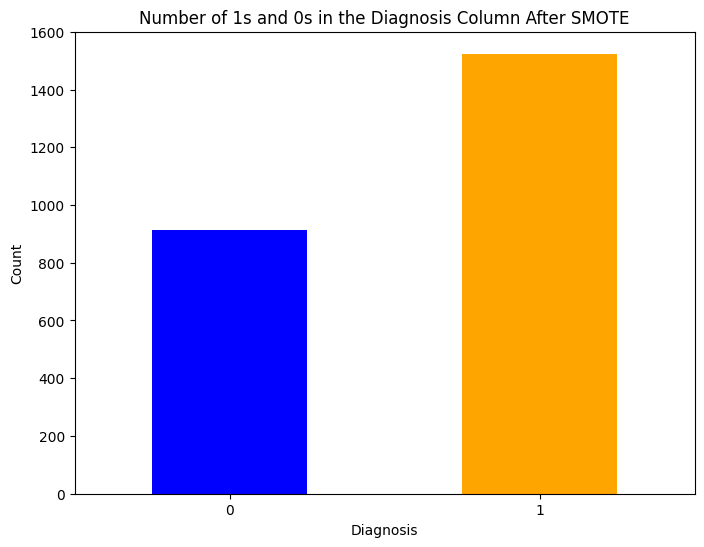

Diagnosis
0     914
1    1524
Name: count, dtype: int64


In [102]:
target_smote_plot = df_smote['Diagnosis'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
target_smote_plot.plot(kind='bar', color=['blue', 'orange'])
plt.title('Number of 1s and 0s in the Diagnosis Column After SMOTE')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['0', '1'], rotation=0)
plt.show()
print(target_smote_plot)

In [103]:
#PCA

df_smote_target_0 = df_smote[df_smote['Diagnosis'] == 0]
df_smote_target_1 = df_smote[df_smote['Diagnosis'] == 1]

temp = df_smote_target_0
temp.drop(columns=['Diagnosis'], inplace=True)
df_smote_pca = pca.transform(temp)

C:\Users\carly\AppData\Local\Temp\ipykernel_28772\614849638.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.drop(columns=['Diagnosis'], inplace=True)
c:\Python\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


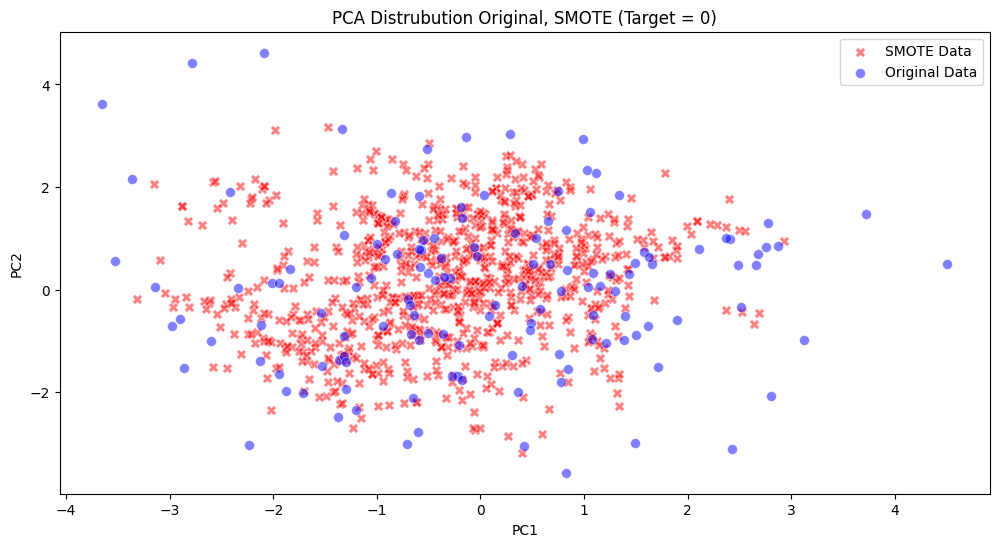

In [104]:
X_pca_df = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
X_pca_df['Source'] = 'Original Data'

X_smote_pca_df = pd.DataFrame(df_smote_pca, columns=['PC1', 'PC2'])
X_smote_pca_df['Source'] = 'SMOTE Data'

combined_df = pd.concat([X_pca_df, X_smote_pca_df])

plt.figure(figsize=(12, 6))

sns.scatterplot(x='PC1', y='PC2', data=X_smote_pca_df, color='red', s=50, marker='X', alpha=0.5, label='SMOTE Data')
sns.scatterplot(x='PC1', y='PC2', data=X_pca_df, color='blue', s=50, alpha=0.5, label='Original Data')

plt.title('PCA Distrubution Original, SMOTE (Target = 0)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [105]:
original_data_pc1 = X_pca_df[X_pca_df['Source'] == 'Original Data']['PC1']
original_data_pc2 = X_pca_df[X_pca_df['Source'] == 'Original Data']['PC2']

smote_data_pc1 = X_smote_pca_df[X_smote_pca_df['Source'] == 'SMOTE Data']['PC1']
smote_data_pc2 = X_smote_pca_df[X_smote_pca_df['Source'] == 'SMOTE Data']['PC2']

# PC1에 대한 ANOVA
f_stat_pc1, p_val_pc1 = stats.f_oneway(original_data_pc1, smote_data_pc1)

# PC2에 대한 ANOVA
f_stat_pc2, p_val_pc2 = stats.f_oneway(original_data_pc2, smote_data_pc2)

print(f"PC1 ANOVA result: F-statistic = {f_stat_pc1}, p-value = {p_val_pc1}")
print(f"PC2 ANOVA result: F-statistic = {f_stat_pc2}, p-value = {p_val_pc2}")

PC1 ANOVA result: F-statistic = 9.362379614826638, p-value = 0.0022712156971119845
PC2 ANOVA result: F-statistic = 3.4292525530252145, p-value = 0.0643324567726564
